In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Policy Gradient算法
目标： 给定参数为θ的策略πθ（s,a） 寻找最优θ

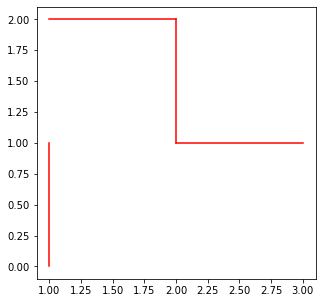

In [4]:
#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red')
plt.plot([1,2],[2,2],color='red')
plt.plot([2,2],[2,1],color='red')
plt.plot([2,3],[1,1],color='red')

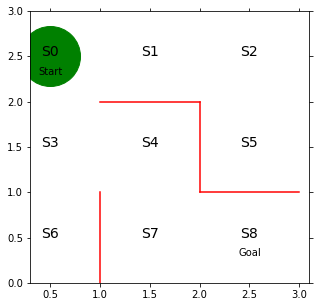

In [5]:
#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red')
plt.plot([1,2],[2,2],color='red')
plt.plot([2,2],[2,1],color='red')
plt.plot([2,3],[1,1],color='red')

cnt = 0
for y in range(3,0,-1):
    for x in range(1,4,1):
        plt.text(x-0.5,y-0.5,'S{}'.format(cnt),size = 14,ha='center')
        cnt+=1

plt.text(0.5,2.3,"Start",ha = 'center')
plt.text(2.5,0.3,"Goal",ha = 'center')

ax.set_xlim(0.3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='off',right='off',left='off',labelleft='off')

line, = ax.plot([0.5],[2.5],marker = 'o',color = 'g',markersize = 60)

In [6]:
theta_0 = np.array([[np.nan,1,1,np.nan], #s0
                    [np.nan,1,np.nan,1], #s1
                    [np.nan,np.nan,1,1],
                    [1,1,1,np.nan],
                    [np.nan,np.nan,1,1],
                    [1,np.nan,np.nan,np.nan],
                    [1,np.nan,np.nan,np.nan],
                    [1,1,np.nan,np.nan],
                   ])

In [7]:
def simple_convert_into_pi_from_theta(theta):
    #直接转换成概率
    [m,n]=theta.shape
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i,:] = theta[i,:] / np.nansum(theta[i,:])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [8]:
#求初始策略pi
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [9]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [10]:
def get_next_s(pi, s):
    direction = ["up","right","down","left"]
    next_direction = np.random.choice(direction, p=pi[s,:])
    
    if next_direction == "up":
        s_next = s-3
    elif next_direction == "right":
        s_next = s+1
    elif next_direction == "down":
        s_next = s+3
    elif next_direction == "left":
        s_next = s-1
        
    return s_next

In [11]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s)
        
        if(next_s == 8):
            break
        else:
            s = next_s
            
    return state_history


In [12]:
state_history = goal_maze(pi_0)

print(state_history)
print("求解迷宫路径所需的步数是{}".format(len(state_history)+1 ))

[0, 1, 0, 3, 0, 1, 2, 1, 2, 5, 2, 5, 2, 1, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 1, 2, 1, 0, 3, 4, 3, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 5, 2, 1, 0, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 0, 3, 6, 3, 4, 3, 4, 7, 8]
求解迷宫路径所需的步数是72


In [13]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    
    exp_theta = np.exp(beta*theta)
    for i in range(0,m):
        pi[i,:]=exp_theta[i,:] / np.nansum(exp_theta[i,:])

    pi = np.nan_to_num(pi)
    
    return pi

In [14]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [15]:
def get_action_and_next_s(pi,s):
    direction = ["up","right","down","left"]
    next_direction = np.random.choice(direction, p=pi[s,:])
    
    if next_direction == "up":
        s_next = s-3
        action = 0
    elif next_direction == "right":
        s_next = s+1
        action = 1
    elif next_direction == "down":
        s_next = s+3
        action =2
    elif next_direction == "left":
        s_next = s-1
        action=3
        
    return [action,s_next]

In [16]:
def goal_maze_ret_s_a(pi):
    s=0
    s_a_history = [[0,np.nan]]
    
    while(1):
        [act,nexts] = get_action_and_next_s(pi,s)
        s_a_history[-1][1]=act
        
        s_a_history.append([nexts,np.nan])
        if nexts ==8:
            break
        else:
            s=nexts
    return s_a_history
    
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)

[[0, 2], [3, 0], [0, 2], [3, 0], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]


In [17]:
def update_theta(theta,pi,s_a_history):
    eta = 0.1 #学习率
    T = len(s_a_history)-1 #到达目标的总步数
    
    [m,n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])):
                SA_i = [SA for SA in s_a_history if SA[0]==i]
                SA_ij = [SA for SA in s_a_history if SA==[i,j]]
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i,j] = (N_ij-pi[i,j]*N_i) / T
                
    new_theta = theta+eta*delta_theta
    return new_theta

In [18]:
new_theta = update_theta(theta_0,pi_0,s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.4906261  0.5093739  0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33750857 0.33331597 0.32917546 0.        ]
 [0.         0.         0.50312496 0.49687504]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49687504 0.50312496 0.         0.        ]]


In [19]:
#下面是策略梯度法的求解迷宫问题
stop_eps = 10**-4
theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta,pi,s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi-pi)))
    print("求解迷宫问题所需步数为{}".format(len(s_a_history)-1))
    
    if np.sum(np.abs(new_pi-pi)) < stop_eps:
        is_continue = False
    else:
        theta = new_theta
        pi    = new_pi
        


0.021530543183561623
求解迷宫问题所需步数为16
0.048653718614924235
求解迷宫问题所需步数为4
0.016679690962929206
求解迷宫问题所需步数为26
0.024090257402623882
求解迷宫问题所需步数为8
0.009148720815251865
求解迷宫问题所需步数为78
0.017046262252173594
求解迷宫问题所需步数为22
0.013171872492992343
求解迷宫问题所需步数为44
0.01815907627863178
求解迷宫问题所需步数为54
0.01536773902085492
求解迷宫问题所需步数为26
0.01913340455885365
求解迷宫问题所需步数为24
0.031564146508961166
求解迷宫问题所需步数为6
0.0073937147222190025
求解迷宫问题所需步数为34
0.01398435808741827
求解迷宫问题所需步数为26
0.010360649124182497
求解迷宫问题所需步数为60
0.013568046354190677
求解迷宫问题所需步数为30
0.016569176150895204
求解迷宫问题所需步数为50
0.007107097344335789
求解迷宫问题所需步数为104
0.013861671614051385
求解迷宫问题所需步数为18
0.03665363931059501
求解迷宫问题所需步数为8
0.031151725989769175
求解迷宫问题所需步数为6
0.01252350425050397
求解迷宫问题所需步数为70
0.02510017620684296
求解迷宫问题所需步数为12
0.024096366350803144
求解迷宫问题所需步数为10
0.036425523593257125
求解迷宫问题所需步数为8
0.009157738619418043
求解迷宫问题所需步数为26
0.030494043913290525
求解迷宫问题所需步数为6
0.025952250769093688
求解迷宫问题所需步数为8
0.04625989819319698
求解迷宫问题所需步数为4
0.015975726121223055
求解迷宫问题所需步数为12


0.011163577134882363
求解迷宫问题所需步数为6
0.016721266933830137
求解迷宫问题所需步数为4
0.026410185084713655
求解迷宫问题所需步数为10
0.0166006198980109
求解迷宫问题所需步数为10
0.022342340396927535
求解迷宫问题所需步数为6
0.019760170770944302
求解迷宫问题所需步数为8
0.013115268738914526
求解迷宫问题所需步数为12
0.011090805513794516
求解迷宫问题所需步数为6
0.01103939943777471
求解迷宫问题所需步数为6
0.01645037630544835
求解迷宫问题所需步数为4
0.012149713165824555
求解迷宫问题所需步数为8
0.01089062584961048
求解迷宫问题所需步数为6
0.016156117784647928
求解迷宫问题所需步数为4
0.010756545274205748
求解迷宫问题所需步数为6
0.010708577430044164
求解迷宫问题所需步数为6
0.01583215313020067
求解迷宫问题所需步数为4
0.015623419057704674
求解迷宫问题所需步数为4
0.01564990610179473
求解迷宫问题所需步数为6
0.015398491192408076
求解迷宫问题所需步数为4
0.012046283673103592
求解迷宫问题所需步数为6
0.015138298374839848
求解迷宫问题所需步数为4
0.014939929115618866
求解迷宫问题所需步数为4
0.016090171252478525
求解迷宫问题所需步数为8
0.014783810861158903
求解迷宫问题所需步数为4
0.015524745677403862
求解迷宫问题所需步数为10
0.01015917635332833
求解迷宫问题所需步数为6
0.014980017401732965
求解迷宫问题所需步数为18
0.014748579713565385
求解迷宫问题所需步数为4
0.022994027198981498
求解迷宫问题所需步数为8
0.015275967785802

求解迷宫问题所需步数为6
0.005754648126500769
求解迷宫问题所需步数为4
0.005697004227318947
求解迷宫问题所需步数为4
0.005640156302553767
求解迷宫问题所需步数为4
0.009303563395923586
求解迷宫问题所需步数为12
0.005595155124801521
求解迷宫问题所需步数为4
0.005539808566554269
求解迷宫问题所需步数为4
0.005485219161430549
求解迷宫问题所需步数为4
0.0074636031585319645
求解迷宫问题所需步数为6
0.005464488451332392
求解迷宫问题所需步数为4
0.005410870133780582
求解迷宫问题所需步数为4
0.022220310757309417
求解迷宫问题所需步数为10
0.00744328038009387
求解迷宫问题所需步数为6
0.005394265220557123
求解迷宫问题所需步数为4
0.005341593832402389
求解迷宫问题所需步数为4
0.0052896350231594474
求解迷宫问题所需步数为4
0.013342665411714486
求解迷宫问题所需步数为6
0.005243605320068331
求解迷宫问题所需步数为4
0.007796421085548122
求解迷宫问题所需步数为10
0.016951734528965826
求解迷宫问题所需步数为16
0.005326441807954482
求解迷宫问题所需步数为4
0.005274817360081868
求解迷宫问题所需步数为4
0.009061188980015067
求解迷宫问题所需步数为6
0.005210019605205701
求解迷宫问题所需步数为4
0.005160057610942806
求解迷宫问题所需步数为4
0.00511076189195013
求解迷宫问题所需步数为4
0.005062121636793815
求解迷宫问题所需步数为4
0.005014126226904836
求解迷宫问题所需步数为4
0.013507011372836678
求解迷宫问题所需步数为16
0.00832357414900041
求解迷宫问题所需步数

0.0028244566702981186
求解迷宫问题所需步数为4
0.002802962644877456
求解迷宫问题所需步数为4
0.005566079149844992
求解迷宫问题所需步数为6
0.007234989703323702
求解迷宫问题所需步数为10
0.006474110559191677
求解迷宫问题所需步数为6
0.002891746382379823
求解迷宫问题所需步数为4
0.007549518612420453
求解迷宫问题所需步数为8
0.0029066419447179304
求解迷宫问题所需步数为4
0.005409524516593843
求解迷宫问题所需步数为6
0.011250456758463034
求解迷宫问题所需步数为10
0.0029656840088616576
求解迷宫问题所需步数为4
0.002942499163714099
求解迷宫问题所需步数为4
0.002919578428818917
求解迷宫问题所需步数为4
0.002896917925048939
求解迷宫问题所需步数为4
0.0028745138417001492
求解迷宫问题所需步数为4
0.002852362435109633
求解迷宫问题所需步数为4
0.002830460027310411
求解迷宫问题所需步数为4
0.00280880300471216
求解迷宫问题所需步数为4
0.002787387816810691
求解迷宫问题所需步数为4
0.0027662109749274424
求解迷宫问题所需步数为4
0.002745269050976766
求解迷宫问题所需步数为4
0.002724558676258891
求解迷宫问题所需步数为4
0.002704076540278974
求解迷宫问题所需步数为4
0.002683819389594874
求解迷宫问题所需步数为4
0.002663784026686551
求解迷宫问题所需步数为4
0.002643967308852975
求解迷宫问题所需步数为4
0.0026243661471310534
求解迷宫问题所需步数为4
0.002604977505238991
求解迷宫问题所需步数为4
0.0051999678574459335
求解迷宫问题所需步数为6
0.0052

0.004152903439095676
求解迷宫问题所需步数为6
0.0042253535813593715
求解迷宫问题所需步数为6
0.0035484912619013695
求解迷宫问题所需步数为6
0.0012190843608817364
求解迷宫问题所需步数为4
0.001212817398318411
求解迷宫问题所需步数为4
0.0012065984055346923
求解迷宫问题所需步数为4
0.001200426896052223
求解迷宫问题所需步数为4
0.001194302389519293
求解迷宫问题所需步数为4
0.0011882244116153268
求解迷宫问题所需步数为4
0.0011821924939616826
求解迷宫问题所需步数为4
0.004222939449392969
求解迷宫问题所需步数为6
0.0011945632688058413
求解迷宫问题所需步数为4
0.0011884572830195006
求解迷宫问题所需步数为4
0.0011823978946401068
求解迷宫问题所需步数为4
0.004261095159258918
求解迷宫问题所需步数为6
0.0011954512236832665
求解迷宫问题所需步数为4
0.004322675347048853
求解迷宫问题所需步数为6
0.0012092890538531048
求解迷宫问题所需步数为4
0.0012030088709097733
求解迷宫问题所需步数为4
0.0011967776693315793
求解迷宫问题所需步数为4
0.001190594939167948
求解迷宫问题所需步数为4
0.001184460177099174
求解迷宫问题所需步数为4
0.0034737914015771573
求解迷宫问题所需步数为6
0.001190513574372734
求解迷宫问题所需步数为4
0.0011843860016687094
求解迷宫问题所需步数为4
0.0011783057297961863
求解迷宫问题所需步数为4
0.0036759844112849646
求解迷宫问题所需步数为6
0.001184878810272745
求解迷宫问题所需步数为4
0.004295819534877732
求解迷宫问题所需步数

求解迷宫问题所需步数为4
0.0007535703241750361
求解迷宫问题所需步数为4
0.0007505233121228791
求解迷宫问题所需步数为4
0.011703953753225305
求解迷宫问题所需步数为8
0.0007511399529928735
求解迷宫问题所需步数为4
0.0007481138057284474
求解迷宫问题所需步数为4
0.0007451057735071501
求解迷宫问题所需步数为4
0.0007421157127927083
求解迷宫问题所需步数为4
0.003256755698459308
求解迷宫问题所需步数为6
0.0007502442234416755
求解迷宫问题所需步数为4
0.003315943352241963
求解迷宫问题所需步数为6
0.0007589343911612173
求解迷宫问题所需步数为4
0.000755839857055858
求解迷宫问题所需步数为4
0.0007527641572768022
求解迷宫问题所需步数为4
0.000749707139418989
求解迷宫问题所需步数为4
0.000746668652616897
求解迷宫问题所需步数为4
0.0007436485475250249
求解迷宫问题所需步数为4
0.002901202958074417
求解迷宫问题所需步数为6
0.0007492447260208854
求解迷宫问题所需步数为4
0.0007462096364607429
求解迷宫问题所需步数为4
0.0007431928869922923
求解迷宫问题所需步数为4
0.0007401943304085265
求解迷宫问题所需步数为4
0.002874791028582853
求解迷宫问题所需步数为6
0.0007434033913256109
求解迷宫问题所需步数为4
0.0007404086858796774
求解迷宫问题所需步数为4
0.0007374319574227073
求解迷宫问题所需步数为4
0.0007344730627403262
求解迷宫问题所需步数为4
0.0007315318600384577
求解迷宫问题所需步数为4
0.0007286082089261424
求解迷宫问题所需步数为4
0.0007257019704

求解迷宫问题所需步数为4
0.00046251668545822106
求解迷宫问题所需步数为4
0.0004610278992722497
求解迷宫问题所需步数为4
0.0004595462835869542
求解迷宫问题所需步数为4
0.00045807179245734714
求解迷宫问题所需步数为4
0.00045660438030598396
求解迷宫问题所需步数为4
0.00045514400191866075
求解迷宫问题所需步数为4
0.00045369061244074707
求解迷宫问题所需步数为4
0.00045224416737455614
求解迷宫问题所需步数为4
0.000450804622575407
求解迷宫问题所需步数为4
0.0023740557042459497
求解迷宫问题所需步数为6
0.0004561008721287174
求解迷宫问题所需步数为4
0.0004546405166621116
求解迷宫问题所需步数为4
0.000453187161876676
求解迷宫问题所需步数为4
0.0024732353361590145
求解迷宫问题所需步数为6
0.00045859541020597597
求解迷宫问题所需步数为4
0.00045712007687446696
求解迷宫问题所需步数为4
0.00045565185751699974
求解迷宫问题所需步数为4
0.00045419070643828996
求解迷宫问题所需步数为4
0.000452736578311394
求解迷宫问题所需步数为4
0.0004512894281696808
求解迷宫问题所需步数为4
0.003549878533099453
求解迷宫问题所需步数为8
0.00046094956609951665
求解迷宫问题所需步数为4
0.00045945901528229513
求解迷宫问题所需步数为4
0.00045797569534052063
求解迷宫问题所需步数为4
0.00045649955953064314
求解迷宫问题所需步数为4
0.0024930879304543574
求解迷宫问题所需步数为6
0.0004620417200283146
求解迷宫问题所需步数为4
0.00046054277528286697
求解迷宫问题所需步

0.0021355421478826617
求解迷宫问题所需步数为6
0.0004441702453543382
求解迷宫问题所需步数为4
0.00044275129774260305
求解迷宫问题所需步数为4
0.0004413391427117788
求解迷宫问题所需步数为4
0.00043993373703846844
求解迷宫问题所需步数为4
0.0004385350378454077
求解迷宫问题所需步数为4
0.00043714300259103944
求解迷宫问题所需步数为4
0.0004357575890721818
求解迷宫问题所需步数为4
0.00043437875541614546
求解迷宫问题所需步数为4
0.0004330064600811083
求解迷宫问题所需步数为4
0.00043164066185131383
求解迷宫问题所需步数为4
0.0004302813198336537
求解迷宫问题所需步数为4
0.002443479395476504
求解迷宫问题所需步数为6
0.00043522863281516763
求解迷宫问题所需步数为4
0.000433850193267582
求解迷宫问题所需步数为4
0.0024121872692743317
求解迷宫问题所需步数为6
0.00043862988548660706
求解迷宫问题所需步数为4
0.0004372338858126233
求解迷宫问题所需步数为4
0.0004358445520199032
求解迷宫问题所需步数为4
0.00043446184175528757
求解迷宫问题所需步数为4
0.00043308571300194193
求解迷宫问题所需步数为4
0.0004317161240735175
求解迷宫问题所需步数为4
0.00043035303361251345
求解迷宫问题所需步数为4
0.00042899640058872285
求解迷宫问题所需步数为4
0.0004276461842934731
求解迷宫问题所需步数为4
0.006088485403524416
求解迷宫问题所需步数为6
0.002107974981259815
求解迷宫问题所需步数为6
0.0004335400461826511
求解迷宫问题所需步数为4
0.00043217373

0.00029789722602666796
求解迷宫问题所需步数为4
0.00029712602524656004
求解迷宫问题所需步数为4
0.00029635781085951204
求解迷宫问题所需步数为4
0.00029559256748616647
求解迷宫问题所需步数为4
0.000294830279843946
求解迷宫问题所需步数为4
0.00029407093275051616
求解迷宫问题所需步数为4
0.0002933145111187127
求解迷宫问题所需步数为4
0.00029256099995865134
求解迷宫问题所需步数为4
0.0002918103843771343
求解迷宫问题所需步数为4
0.0002910626495739241
求解迷宫问题所需步数为4
0.00029031778084524437
求解迷宫问题所需步数为4
0.0002895757635790891
求解迷宫问题所需步数为4
0.0002888365832576789
求解迷宫问题所需步数为4
0.00028810022545431094
求解迷宫问题所需步数为4
0.0002873666758343024
求解迷宫问题所需步数为4
0.00028663592015379727
求解迷宫问题所需步数为4
0.00028590794425890215
求解迷宫问题所需步数为4
0.0002851827340854436
求解迷宫问题所需步数为4
0.001928597433801072
求解迷宫问题所需步数为6
0.00028878553372995927
求解迷宫问题所需步数为4
0.0002880481178949672
求解迷宫问题所需步数为4
0.002783298013751493
求解迷宫问题所需步数为8
0.0019753143572799267
求解迷宫问题所需步数为6
0.0002987671328706122
求解迷宫问题所需步数为4
0.0002979884230826166
求解迷宫问题所需步数为4
0.0002972127573014384
求解迷宫问题所需步数为4
0.00029644011966541844
求解迷宫问题所需步数为4
0.0002956704944195379
求解迷宫问题所需步数为4
0.000294903

0.00027072212706141796
求解迷宫问题所需步数为4
0.00027004134192618046
求解迷宫问题所需步数为4
0.0002693631446880375
求解迷宫问题所需步数为4
0.000268687522141417
求解迷宫问题所需步数为4
0.0016551988693709156
求解迷宫问题所需步数为6
0.0002707384407269961
求解迷宫问题所需步数为4
0.00027005909796517374
求解迷宫问题所需步数为4
0.00026938232837533244
求解迷宫问题所需步数为4
0.0002687081188894151
求解迷宫问题所需步数为4
0.0002680364565230929
求解迷宫问题所需步数为4
0.002003119373372067
求解迷宫问题所需步数为6
0.0002723570081387579
求解迷宫问题所需步数为4
0.00027166867354033036
求解迷宫问题所需步数为4
0.0022949811739984456
求解迷宫问题所需步数为8
0.00027619076722846386
求解迷宫问题所需步数为4
0.00027548908872477434
求解迷宫问题所需步数为4
0.00027479010430007944
求解迷宫问题所需步数为4
0.0002740938000743466
求解迷宫问题所需步数为4
0.000273400162255244
求解迷宫问题所需步数为4
0.001707718746353025
求解迷宫问题所需步数为6
0.001712526209479634
求解迷宫问题所需步数为6
0.00027941544837932486
求解迷宫问题所需步数为4
0.00027870287861883267
求解迷宫问题所需步数为4
0.00027799305001790717
求解迷宫问题所需步数为4
0.00027728594845411944
求解迷宫问题所需步数为4
0.00027658155989701214
求解迷宫问题所需步数为4
0.0002758798704045745
求解迷宫问题所需步数为4
0.0002751808661271421
求解迷宫问题所需步数为4
0.0002744845

0.00020238189768514124
求解迷宫问题所需步数为4
0.00020194187262786122
求解迷宫问题所需步数为4
0.00020150329490986954
求解迷宫问题所需步数为4
0.00020106615812991516
求解迷宫问题所需步数为4
0.0017553241427792736
求解迷宫问题所需步数为6
0.00020457943508636958
求解迷宫问题所需步数为4
0.00020412999601985247
求解迷宫问题所需步数为4
0.00020368205567403153
求解迷宫问题所需步数为4
0.00020323560730839928
求解迷宫问题所需步数为4
0.00020279064421969452
求解迷宫问题所需步数为4
0.0002023471597442112
求解迷宫问题所需步数为4
0.000201905147253819
求解迷宫问题所需步数为4
0.00020146460016009712
求解迷宫问题所需步数为4
0.0002010255119098206
求解迷宫问题所需步数为4
0.00020058787598921206
求解迷宫问题所需步数为4
0.00020015168591834553
求解迷宫问题所需步数为4
0.00019971693525654144
求解迷宫问题所需步数为4
0.00019928361759725954
求解迷宫问题所需步数为4
0.0014563367974925918
求解迷宫问题所需步数为6
0.00020118818529117795
求解迷宫问题所需步数为4
0.00020075075791265058
求解迷宫问题所需步数为4
0.00020031477187310714
求解迷宫问题所需步数为4
0.0001998802207736558
求解迷宫问题所需步数为4
0.00019944709825571623
求解迷宫问题所需步数为4
0.0001990153979933764
求解迷宫问题所需步数为4
0.00019858511369899405
求解迷宫问题所需步数为4
0.00019815623911653354
求解迷宫问题所需步数为4
0.00019772876802841635
求解迷宫问题所需步数为4


求解迷宫问题所需步数为4
0.00017825921983257408
求解迷宫问题所需步数为4
0.00017789414134331862
求解迷宫问题所需步数为4
0.00017753019745227888
求解迷宫问题所需步数为4
0.000177167383403452
求解迷宫问题所需步数为4
0.00017680569446507435
求解迷宫问题所需步数为4
0.00146248685037529
求解迷宫问题所需步数为6
0.000178919256020732
求解迷宫问题所需步数为4
0.00017855226197960317
求解迷宫问题所需步数为4
0.00017818640936655833
求解迷宫问题所需步数为4
0.00017782169339918864
求解迷宫问题所需步数为4
0.00017745810931786045
求解迷宫问题所需步数为4
0.00017709565239095934
求解迷宫问题所需步数为4
0.00017673431790861394
求解迷宫问题所需步数为4
0.000176374101188927
求解迷宫问题所需步数为4
0.0001760149975725614
求解迷宫问题所需步数为4
0.00017565700242475057
求解迷宫问题所需步数为4
0.00017530011113719643
求解迷宫问题所需步数为4
0.0001749443191221764
求解迷宫问题所需步数为4
0.00017458962181963848
求解迷宫问题所需步数为4
0.0001742360146909233
求解迷宫问题所需步数为4
0.001240369697282126
求解迷宫问题所需步数为6
0.00017581702485512836
求解迷宫问题所需步数为4
0.00017546039845877
求解迷宫问题所需步数为4
0.0012657231904488406
求解迷宫问题所需步数为6
0.0014767641262587276
求解迷宫问题所需步数为6
0.00017968325966677412
求解迷宫问题所需步数为4
0.00017931535195358193
求解迷宫问题所需步数为4
0.00017894858277724655
求解迷宫问题所需步数为

求解迷宫问题所需步数为4
0.0001603701749486458
求解迷宫问题所需步数为4
0.00016004524190274018
求解迷宫问题所需步数为4
0.00015972133068911133
求解迷宫问题所需步数为4
0.00015939843689597062
求解迷宫问题所需步数为4
0.00015907655613422306
求解迷宫问题所需步数为4
0.00015875568403981265
求解迷宫问题所需步数为4
0.0017105114870286688
求解迷宫问题所需步数为6
0.00016236736825999028
求解迷宫问题所需步数为4
0.001296905402089538
求解迷宫问题所需步数为6
0.00016382124160813777
求解迷宫问题所需步数为4
0.00016348399709086026
求解迷宫问题所需步数为4
0.00016314783288956525
求解迷宫问题所需步数为4
0.001746802553413463
求解迷宫问题所需步数为6
0.0013325588450788274
求解迷宫问题所需步数为6
0.00016881558948226433
求解迷宫问题所需步数为4
0.00016846068276153876
求解迷宫问题所需步数为4
0.00016810694026086863
求解迷宫问题所需步数为4
0.00016775435671866068
求解迷宫问题所需步数为4
0.00016740292690276513
求解迷宫问题所需步数为4
0.00016705264561293377
求解迷宫问题所需步数为4
0.0001667035076776957
求解迷宫问题所需步数为4
0.00016635550795583362
求解迷宫问题所需步数为4
0.00016600864133648613
求解迷宫问题所需步数为4
0.00016566290273642773
求解迷宫问题所需步数为4
0.00016531828710406385
求解迷宫问题所需步数为4
0.000164974789414506
求解迷宫问题所需步数为4
0.00016463240467299786
求解迷宫问题所需步数为4
0.0001642911279133262
求解迷

0.00012450345211081557
求解迷宫问题所需步数为4
0.00012428452396251975
求解迷宫问题所需步数为4
0.00012406618743494684
求解迷宫问题所需步数为4
0.00012384844035170234
求解迷宫问题所需步数为4
0.00012363128054622592
求解迷宫问题所需步数为4
0.00012341470586115302
求解迷宫问题所需步数为4
0.0001231987141506654
求解迷宫问题所需步数为4
0.0014470230980853146
求解迷宫问题所需步数为6
0.00012580085983298663
求解迷宫问题所需步数为4
0.00012557700723307003
求解迷宫问题所需步数为4
0.0001253537693484321
求解迷宫问题所需步数为4
0.0012359378758344964
求解迷宫问题所需步数为6
0.00012695345553460566
求解迷宫问题所需步数为4
0.00012672673081712098
求解迷宫问题所需步数为4
0.00012650062998638412
求解迷宫问题所需步数为4
0.00012627515070097808
求解迷宫问题所需步数为4
0.00012605029063078588
求解迷宫问题所需步数为4
0.00012582604745691069
求解迷宫问题所需步数为4
0.00012560241887150068
求解迷宫问题所需步数为4
0.00012537940257641503
求解迷宫问题所需步数为4
0.00012515699628653197
求解迷宫问题所需步数为4
0.00012493519772699933
求解迷宫问题所需步数为4
0.00012471400463197335
求解迷宫问题所需步数为4
0.00012449341474871263
求解迷宫问题所需步数为4
0.00012427342583483554
求解迷宫问题所需步数为4
0.00012405403565633917
求解迷宫问题所需步数为4
0.00012383524199248083
求解迷宫问题所需步数为4
0.0012527414872639461
求解迷宫问题所需步数

0.00011180826517415664
求解迷宫问题所需步数为4
0.00011162224582199343
求解迷宫问题所需步数为4
0.00011143670241376205
求解迷宫问题所需步数为4
0.00011125163328730425
求解迷宫问题所需步数为4
0.00011106703678987785
求解迷宫问题所需步数为4
0.00011088291127611498
求解迷宫问题所需步数为4
0.00011069925510573571
求解迷宫问题所需步数为4
0.00011051606664843998
求解迷宫问题所需步数为4
0.00011033334427992814
求解迷宫问题所需步数为4
0.00011015108638204318
求解迷宫问题所需步数为4
0.001005601252116203
求解迷宫问题所需步数为6
0.00011128374967084992
求解迷宫问题所需步数为4
0.00011109956466733711
求解迷宫问题所需步数为4
0.00011091584747745242
求解迷宫问题所需步数为4
0.00011073259648263466
求解迷宫问题所需步数为4
0.00011054981007357044
求解迷宫问题所需步数为4
0.00011036748664570474
求解迷宫问题所需步数为4
0.00011018562460379452
求解迷宫问题所需步数为4
0.00011000422235844624
求解迷宫问题所需步数为4
0.00010982327832729198
求解迷宫问题所需步数为4
0.0001096427909346373
求解迷宫问题所需步数为4
0.00010946275861331393
求解迷宫问题所需步数为4
0.00010928317980024062
求解迷宫问题所需步数为4
0.00010910405294174523
求解迷宫问题所需步数为4
0.00010892537648931992
求解迷宫问题所需步数为4
0.0013588593085819955
求解迷宫问题所需步数为6
0.00011123621862427387
求解迷宫问题所需步数为4
0.00011105095798288195
求解迷宫问题所需步

In [20]:
#确认最终策略
np.set_printoptions(precision=3,suppress=False)
print(pi)

[[0.    0.011 0.989 0.   ]
 [0.    0.268 0.    0.732]
 [0.    0.    0.458 0.542]
 [0.01  0.981 0.009 0.   ]
 [0.    0.    0.98  0.02 ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


In [21]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state%3)+0.5
    y = 2.5-int(state/3)
    line.set_data(x,y)
    return (line,)

anim = FuncAnimation(fig, animate,init_func = init,frames=len(s_a_history),interval = 200, repeat = False)



In [22]:
anim

In [23]:
print(anim)

In [24]:
HTML(anim.to_jshtml())